In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [144]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 192

In [145]:
# data = pd.read_csv('snipe_data.csv')
# labels = data['label'].values.astype(np.int64)
# data = data.drop('label', axis=1).values.astype(np.uint8)
# data = data.reshape(-1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)

data = np.load('snipe_data.npz')['arr_0']
labels = data[:,0]
metadata = data[:,1:8]
image_data = data[:,8:]
# data = data.reshape(-1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)
image_data = image_data.reshape(-1, IMAGE_HEIGHT, IMAGE_WIDTH, 1).astype(np.uint8)
print(image_data.shape)


(166, 256, 192, 1)


In [146]:
# Create image label names
label_names = pd.read_csv('labels.csv',header=None)
label_names = label_names.values.flatten()
label_names = label_names.flatten()
label_names

array(['Abigail', 'Allyn', 'Anna', 'Ben', 'Emily', 'Evelyn', 'Garrett',
       'Jacob', 'Katie', 'Kiana', 'Lillian', 'Mike', 'Natasa', 'Nathan',
       'Nikki', 'Reilly', 'Spencer', 'Steph', 'Zoe'], dtype=object)

In [147]:
def get_sniper_name(sniper_index):
    label_names[sniper_index]

metadata_df = pd.DataFrame(data=metadata, columns=["sniper", "was-aware", "month", "day", "hour", "minute", "week_day"])

# replace indexes of snipers with their names
metadata_df["sniper_name"] = "sniper_" + label_names[metadata_df["sniper"]]
metadata_df = metadata_df.drop('sniper',axis=1)

# get one-hot encoding of the sniper category
one_hot = pd.get_dummies(metadata_df['sniper_name'])
metadata_df = metadata_df.drop('sniper_name',axis = 1)
metadata_df = metadata_df.join(one_hot)

print(tabulate(metadata_df.head(10), headers=metadata_df.keys()))

       was-aware    month    day    hour    minute    week_day    sniper_Allyn    sniper_Anna    sniper_Emily    sniper_Evelyn    sniper_Katie    sniper_Kiana    sniper_Natasa    sniper_Nathan    sniper_Nikki    sniper_Reilly    sniper_Spencer
---  -----------  -------  -----  ------  --------  ----------  --------------  -------------  --------------  ---------------  --------------  --------------  ---------------  ---------------  --------------  ---------------  ----------------
  0            0       10     29      12        56           1               0              0               0                0               0               1                0                0               0                0                 0
  1            0       10     29      12        55           1               0              0               0                0               0               1                0                0               0                0                 0
  2            0       1

In [148]:
# Define function that plots multiple images in an array of images
def PlotImages(ix_start,num_img,rows,cols,images,labels,label_names):
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    for i in range(num_img):
        plt.subplot(rows,cols,i+1)
        plt.axis('off')
        plt.imshow(-1*images[ix_start+i]+256, cmap="Greys")
        plt.title(label_names[labels[ix_start+i]])

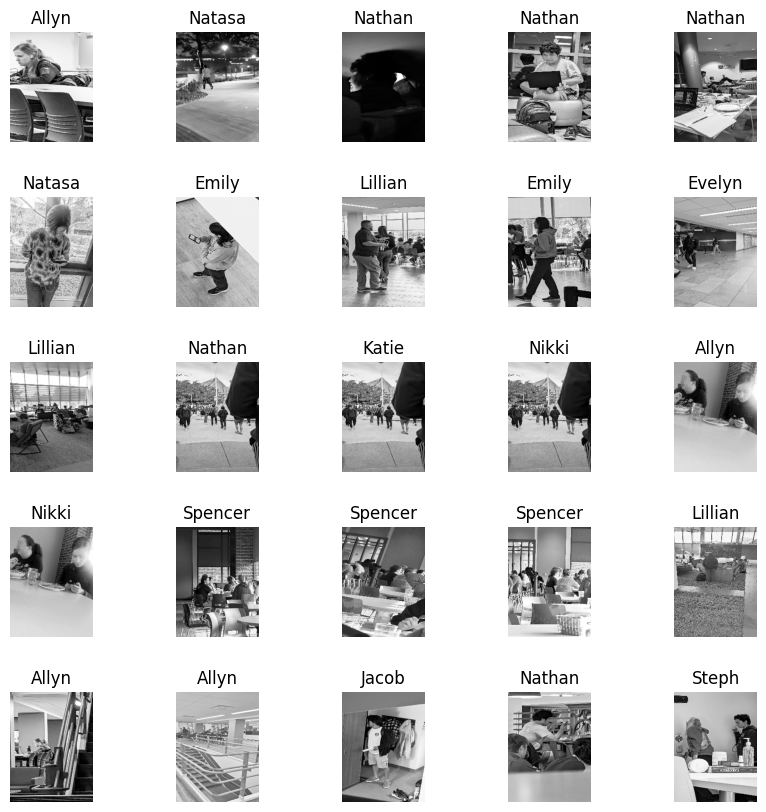

In [149]:
PlotImages(0,25,5,5, image_data,labels,label_names)